In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

In [21]:
dataset1 = pd.read_csv('data.csv')

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('MyMLData').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'Input':'float'})
dataset1 = dataset1.astype({'Output':'float'})

In [22]:
dataset1.head()

,input,output
0,1,369
1,2,302
2,3,423
3,4,428
4,5,432


In [24]:
X = dataset1[['input']].values
y = dataset1[['output']].values

In [25]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)

In [27]:
Scaler = MinMaxScaler()

In [28]:
Scaler.fit(X_train)

MinMaxScaler()

In [33]:
X_train1 = Scaler.transform(X_train)
X_test1 = Scaler.transform(X_test)
X_train1

array([[0.14285714],
       [0.85714286],
       [0.28571429],
       [0.        ],
       [1.        ],
       [0.57142857]])

In [30]:
#Create the model
#Include your code here
ai_brain = Sequential([
    Dense(5,activation = 'relu'),
    Dense(7,activation = 'relu'),
    Dense(1)])


In [31]:
#Compile the model
#Include your code here
ai_brain.compile(
    optimizer = 'rmsprop',
    loss = 'mse'
)


In [35]:
# fit the model
#Include your code here
ai_brain.fit(X_train1,y_train,epochs = 4000)


Epoch 1/4000
1/1 [==============================] - 1s 1s/step - loss: 152804.5156
Epoch 2/4000
1/1 [==============================] - 0s 17ms/step - loss: 152794.6406
Epoch 3/4000
1/1 [==============================] - 0s 17ms/step - loss: 152789.0156
Epoch 4/4000
1/1 [==============================] - 0s 8ms/step - loss: 152784.8281
Epoch 5/4000
1/1 [==============================] - 0s 9ms/step - loss: 152781.0781
Epoch 6/4000
1/1 [==============================] - 0s 13ms/step - loss: 152777.6406
Epoch 7/4000
1/1 [==============================] - 0s 13ms/step - loss: 152774.4688
Epoch 8/4000
1/1 [==============================] - 0s 12ms/step - loss: 152771.4531
Epoch 9/4000
1/1 [==============================] - 0s 9ms/step - loss: 152768.5469
Epoch 10/4000
1/1 [==============================] - 0s 11ms/step - loss: 152765.7344
Epoch 11/4000
1/1 [==============================] - 0s 9ms/step - loss: 152762.9844
Epoch 12/4000
1/1 [==============================] - 0s 8ms/step - lo

In [36]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

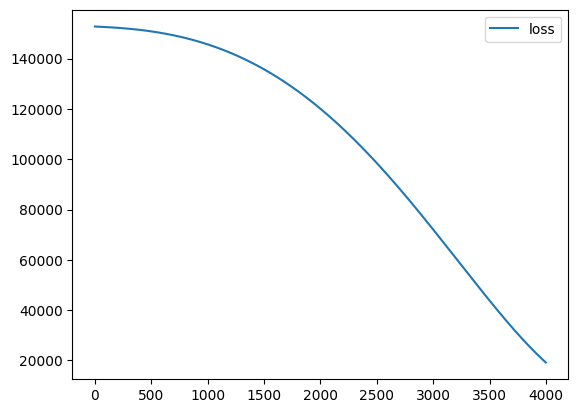

In [37]:
loss_df.plot()

In [38]:
X_test1 = Scaler.transform(X_test)

In [39]:
ai_brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 208ms/step - loss: 10869.5156


10869.515625

In [40]:
X_n1 = [[30]]

In [41]:
X_n1_1 = Scaler.transform(X_n1)

In [42]:
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 100ms/step


array([[893.69995]], dtype=float32)